In [6]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.image as mpimg
from mlxtend.plotting import plot_confusion_matrix

In [10]:
#caminhos para cada um dos conjuntos de imagens a serem utilizadas
caminho_treinamento='Images/BD_treinamento'  #dividido em 2 pastas (sadias e contaminadas) - 60/60
caminho_validacao='Images/BD_validacao' #dividido em 2 pastas (sadias e contaminadas) - 20/20
caminho_teste='Images/BD_teste' #dividido em 2 pastas (sadias e contaminadas) - 25/25

In [11]:
#---------------------------------------------------
# Conhecendo e Preparando o BD
#----------------------------------------------------

#cria a batelada utilizando dados que estão no disco 
# ImageDataGenerator - utilizada para adicionar as imagens e converter em um formato padrão (224x224)
batelada_treino=ImageDataGenerator().flow_from_directory(caminho_treinamento,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=10)
batelada_validacao=ImageDataGenerator().flow_from_directory(caminho_validacao,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=5)
batelada_teste=ImageDataGenerator().flow_from_directory(caminho_teste,target_size=(224,224),classes=['sadias','contaminadas'],batch_size=10)

Found 130 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [12]:
#utilizado para interar sobre a batelada de dados 
img,labels = next(batelada_treino)

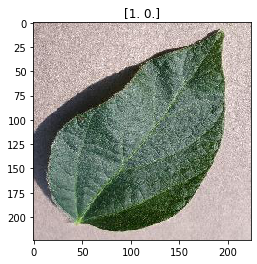

In [13]:
#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(img[0].astype(np.uint8)) # seleciona a imagem da posição [0]
plt.title("{}".format(labels[0]))
plt.show()  # mostra a imagem

In [14]:
#---------------------------------------------------
# Criando o primeiro modelo de classificação
#----------------------------------------------------

#criando o modelo de rede convolucionária
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))# 32= número de neurônios na camada/ (3,3)= filtro utilizado para percorrer 
#a imagem / (224,224,3)= tamanho das imagens comprimento 224x largura 224 e RGB=3
model.add(Flatten()) #utilizada para criar um vetor para a entrada de dados na camada de saída
model.add(Dense(2,activation='softmax'))# camada de saída da rede 2 neurônios. 10= sadia /01= contaminada

#mostrando a configuração da rede CNN criada
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [15]:
#definindo o otimizador e a função perda
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#treinamento do modelo
history=model.fit_generator(batelada_treino,steps_per_epoch=12,validation_data=batelada_validacao,validation_steps=4,epochs=20,verbose=2)
#deve ser utilizada, pois estamos realizando o treinamento via batelada
#steps_per_epoch = define a quantidade de epocas utilizadas para treinamento, baseando-se no numero de dados utilizados
#vamos utilizar 120 imagens para treinamento (60 sadias e 60 contaminadas), como a batelada é de 10, temos 120/10 = 12 vezes
# validation_data = utilizado para gerar a validação (compara o desempenho do treinamento com o valor real): a cada epoca de treinamento,
#compara o resultado obtido com a previsão realizada nas
#imagens de validação
#verbose=2 - indica o que desejamos exibir na saída do treinamento

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
12/12 - 3s - loss: 1487.5992 - accuracy: 0.5167 - val_loss: 518.7953 - val_accuracy: 0.6000
Epoch 2/20
12/12 - 2s - loss: 250.7289 - accuracy: 0.6000 - val_loss: 59.4669 - val_accuracy: 0.7000
Epoch 3/20
12/12 - 3s - loss: 52.7686 - accuracy: 0.7833 - val_loss: 77.4209 - val_accuracy: 0.6500
Epoch 4/20
12/12 - 2s - loss: 68.7059 - accuracy: 0.8083 - val_loss: 527.9527 - val_accuracy: 0.4500
Epoch 5/20
12/12 - 3s - loss: 67.6254 - accuracy: 0.8250 - val_loss: 102.8215 - val_accuracy: 0.6500
Epoch 6/20
12/12 - 3s - loss: 14.8278 - accuracy: 0.9083 - val_loss: 95.0798 - val_accuracy: 0.8000
Epoch 7/20
12/12 - 4s - loss: 65.1127 - accuracy: 0.8167 - val_loss: 195.6289 - val_accuracy: 0.5000
Epoch 8/20
12/12 - 4s - loss: 48.2388 - accuracy: 0.8750 - val_loss: 113.2128 - val_accuracy: 0.7000
Epoch 9/20
12/12 - 4s - loss: 9.6697 - accuracy: 0.9417 - val_loss: 484.7406 - val_accuracy: 0.4500
Epoch 10/20
12/1

In [17]:
# Lista os dados históricos do treinamento
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


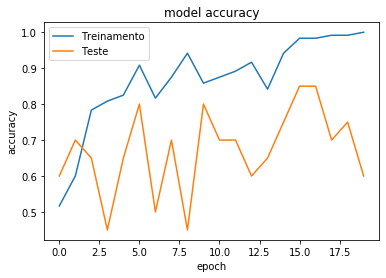

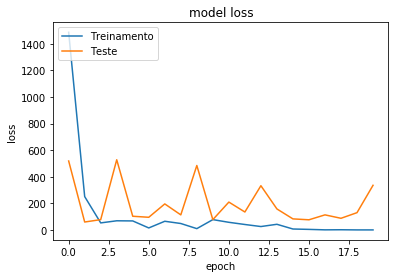

In [19]:
# summarize history para a accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()

In [20]:
#---------------------------------------------------
# Realiza a previsão do modelo
#----------------------------------------------------

#previsão sobre qual imagem corresponde a cada elemento
teste_img, teste_labels=next(batelada_teste)

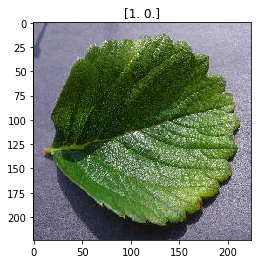

In [21]:
#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(teste_img[0].astype(np.uint8)) 
plt.title("{}".format(teste_labels[0]))
plt.show()  # mostra a imagem

In [22]:
#testar a classificação da imagens 
teste_labels=teste_labels[:,0] # transforma sadias (10) em 1 e contaminadas (01) em apenas 0

#realiza a previsão utilizando os dados de teste
previsao=model.predict_generator(batelada_teste,steps=1,verbose=0)
#como no fit, devemos utilizar o generator, pois estamos utilizando as bateladas de dados 
print(previsao)

Instructions for updating:
Please use Model.predict, which supports generators.
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


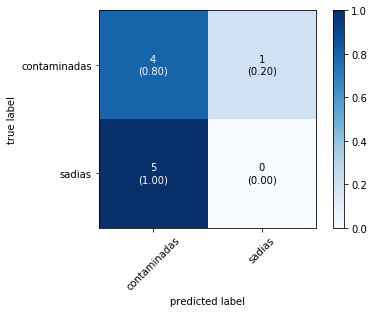

In [23]:
#criando a matriz de confusão para comparar os resultados
matriz_confusao=confusion_matrix(teste_labels,previsao[:,0])
nomes_das_classes=['contaminadas','sadias']
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=nomes_das_classes)
plt.show()

In [24]:
#-----------------------------------------------------------------------------
#  Melhorando a prevesão do modelo - TRANSFER LEARNING
#----------------------------------------------------------------------------


vgg16_model=tf.keras.applications.vgg16.VGG16() # classe já pre-treinada para ser utilizada em nosso classificador

vgg16_model.summary()# vamos ver como o modelo do vgg16 foi construído

print(type(vgg16_model))

553467904/553467096 [==============================] - 37s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [25]:
#transformando o tipo model do vgg16 em sequencial
model=Sequential()  #cria um modelo sequencial 
for layer in vgg16_model.layers[:-1]: #extrai cada uma das camadas do vgg16 
    model.add(layer)            #adiciona no modelo criado até a penultima camada
    
model.summary()
print(type(model))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [26]:
# retirar a ultima camada do modelo, pois só desejamos classificar entre 2 grupos de imagens
#model.layers.pop()

#colocando as camadas intermediárias em modo de "hibernação"
for layer in model.layers:
    layer.trainable=False
#colocar em modo de hibernação, garante que, durante o treinamento, os pesos não serão atualizados
    
#adicionando a ultima camada para a classificação entre 2 grupos de imagens (cachorros ou gatos)    
model.add(Dense(2, activation='softmax'))

#mostra o novo modelo CNN (nosso+vgg16)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [27]:
#----------------------------------------------------------------------------
#  Inicia o treinamento através dos novos pesos
#---------------------------------------------------------------------------

#definindo o otimizador e a função perda
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

#treinamento do modelo
history=model.fit_generator(batelada_treino,steps_per_epoch=12, validation_data=batelada_validacao, validation_steps=4, epochs=20,verbose=2)

Epoch 1/20
12/12 - 58s - loss: 0.7634 - accuracy: 0.6250 - val_loss: 0.9025 - val_accuracy: 0.4500
Epoch 2/20
12/12 - 62s - loss: 0.7111 - accuracy: 0.6167 - val_loss: 0.6325 - val_accuracy: 0.7000
Epoch 3/20
12/12 - 54s - loss: 0.6084 - accuracy: 0.6500 - val_loss: 0.6469 - val_accuracy: 0.6500
Epoch 4/20
12/12 - 54s - loss: 0.4622 - accuracy: 0.7417 - val_loss: 0.3886 - val_accuracy: 0.8000
Epoch 5/20
12/12 - 54s - loss: 0.4064 - accuracy: 0.8167 - val_loss: 0.6106 - val_accuracy: 0.6500
Epoch 6/20
12/12 - 49s - loss: 0.4412 - accuracy: 0.7833 - val_loss: 0.3360 - val_accuracy: 0.9000
Epoch 7/20
12/12 - 52s - loss: 0.3501 - accuracy: 0.8500 - val_loss: 0.4986 - val_accuracy: 0.7500
Epoch 8/20
12/12 - 54s - loss: 0.3301 - accuracy: 0.8417 - val_loss: 0.3801 - val_accuracy: 0.8500
Epoch 9/20
12/12 - 56s - loss: 0.2964 - accuracy: 0.8833 - val_loss: 0.4213 - val_accuracy: 0.7500
Epoch 10/20
12/12 - 57s - loss: 0.2673 - accuracy: 0.9083 - val_loss: 0.5054 - val_accuracy: 0.7500
Epoch 11/

In [29]:
#previsão utilizando o modelo+VGG16

#previsão sobre qual imagem corresponde a cada elemento
teste_img, teste_labels=next(batelada_teste)

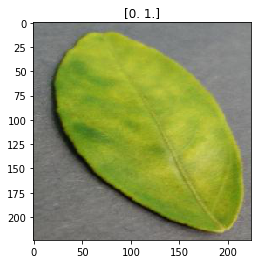

In [30]:
#utilizado para mostrar as imagens 
plt.figure()
plt.imshow(teste_img[4].astype(np.uint8)) #seleciona a imagem da posição 4
plt.title("{}".format(teste_labels[4]))
plt.show()  # mostra a imagem

In [31]:
#testar a classificação da imagens 
teste_labels=teste_labels[:,0] # transforma sadias 10 em 1 e contaminadas 01 em apenas 0

In [32]:
#realiza a previsão utilizando os dados de teste
previsao=model.predict_generator(batelada_teste,steps=1,verbose=0)
#como no fit, devemos utilizar o generator, pois estamos utilizando as bateladas de dados 
print(previsao)

[[7.5186449e-01 2.4813546e-01]
 [8.3060640e-01 1.6939364e-01]
 [9.7535443e-01 2.4645550e-02]
 [8.8894475e-01 1.1105525e-01]
 [6.3801140e-01 3.6198866e-01]
 [5.4465543e-04 9.9945539e-01]
 [7.7040768e-01 2.2959234e-01]
 [1.1855527e-02 9.8814440e-01]
 [9.8238325e-01 1.7616754e-02]
 [1.3491611e-03 9.9865085e-01]]


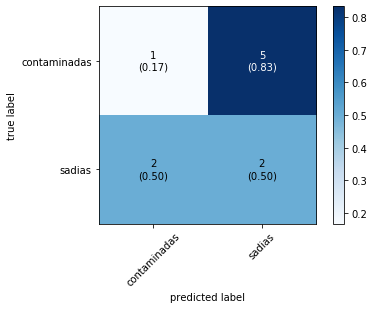

In [33]:
#criando a matriz de confusão para comparar os resultados
matriz_confusao=confusion_matrix(teste_labels,np.round(previsao[:,0])) # a diferença é que a rede gera valores float, então devemos converter
#em valores inteiros (0,1)
nomes_das_classes=['contaminadas','sadias']
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names=nomes_das_classes)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


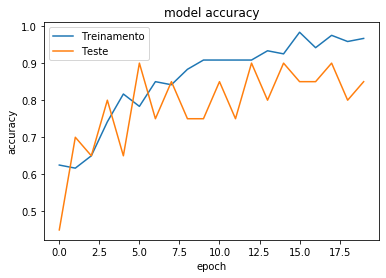

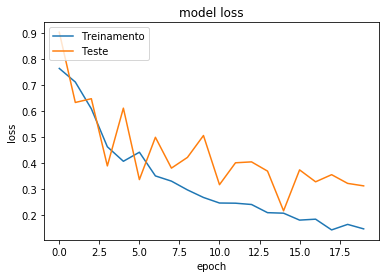

In [34]:
# Lista os dados históricos do treinamento
print(history.history.keys())
# summarize history para a accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc='upper left')
plt.show()